<a href="https://colab.research.google.com/github/RithikaVeerala/people_recognition/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install opencv-python-headless numpy


In [78]:
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights

--2025-12-30 09:51:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.pjreddie.com/files/yolov3.weights [following]
--2025-12-30 09:51:49--  https://data.pjreddie.com/files/yolov3.weights
Resolving data.pjreddie.com (data.pjreddie.com)... 104.21.88.156, 172.67.185.199, 2606:4700:3037::6815:589c, ...
Connecting to data.pjreddie.com (data.pjreddie.com)|104.21.88.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   106MB/s    in 2.2s    

2025-12-30 09:51:51 (106 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [79]:
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2025-12-30 09:51:52--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-12-30 09:51:52 (51.0 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [80]:
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2025-12-30 09:51:52--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2025-12-30 09:51:53 (42.0 MB/s) - ‘coco.names’ saved [625/625]



In [71]:
from google.colab import files
upload=files.upload()

Saving pp.png to pp (1).png


In [72]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [82]:
#load yolo model
net=cv2.dnn.readNetFromDarknet('yolov3.cfg','yolov3.weights')
#load coco names
with open('coco.names','r') as f:
 classes=f.read().strip().split("\n")
 print("First 5 classes:", classes[:5])
#get output layers
layer_names=net.getLayerNames()
output_layers=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]
#load image
image=cv2.imread('pp.png')
height,width,channels=image.shape

First 5 classes: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane']


In [74]:
#create blob
blob=cv2.dnn.blobFromImage(image,1/255.0,(416,416),(0,0,0),True,crop=False)
net.setInput(blob)
outputs=net.forward(output_layers)
boxes=[]
confidences=[]
class_ids=[]

In [75]:
#process detections
for output in outputs:
  for detection in output:
    scores=detection[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]

    #detect only persons
    if confidence>0.5 and class_id==0: # Assuming class_id 0 is 'person' from coco.names
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)
      x=int(center_x-w/2)
      y=int(center_y-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [76]:
# The detection logic has been moved to the previous cell.

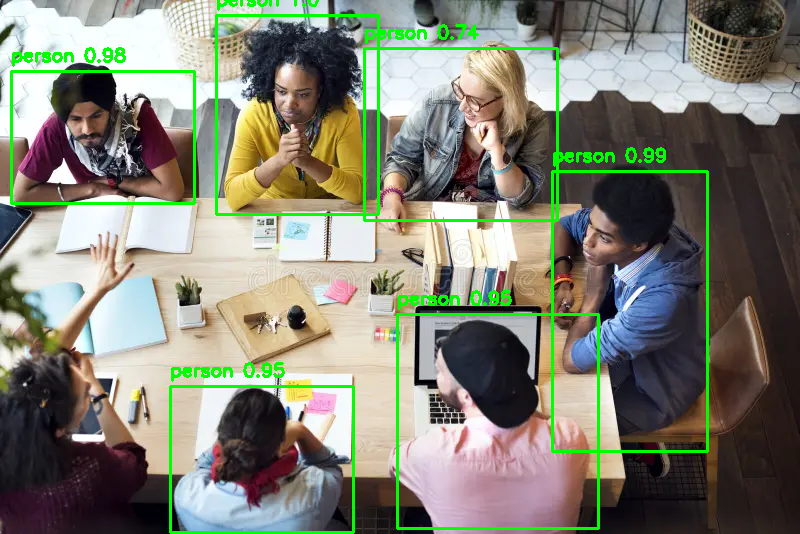

In [83]:
# Apply non-maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Ensure indexes is not empty and flatten it
if len(indexes) > 0:
    indexes = indexes.flatten()

# Draw bounding boxes and labels
for i in indexes:
    x, y, w, h = boxes[i]
    confidence = round(confidences[i], 2)

    # ✅ Force correct label
    label = "person"

    color = (0, 255, 0)  # Green
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(
        image,
        f"{label} {confidence}",
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        color,
        2
    )

# Show output image
cv2_imshow(image)